In [89]:
import numpy as np
import matplotlib.pyplot as plt

In [90]:
def initialise(input_neuron,hidden_neuron,output_neuron):
    w1 = np.random.rand(hidden_neuron,input_neuron)-0.5
    w2 = np.random.rand(output_neuron,hidden_neuron)-0.5
    b1 = np.zeros((hidden_neuron,1))
    b2 = np.zeros((output_neuron,1))
    return w1,b1,w2,b2


In [91]:
def relu(x):
    a = 1/(1+np.exp(-x))
    return a
def linear(x):
    return x

def derivative_linear(x):
    return 1

def derivative_relu(x):
    x = relu(x)
    a = 1-x
    return x*a

In [92]:
x = relu(np.array([0.5,0.5]).reshape(2,1))
a = derivative_relu(x)
print(a.shape)

(2, 1)


In [93]:
def forwardProp(a0,w1,b1,w2,b2):
    z1 = np.dot(w1,a0)+b1
    a1 = relu(z1)
    z2 = np.dot(w2,a1)+b2
    a2 = linear(z2)
    return z1,a1,z2,a2

In [94]:
w1,b1,w2,b2 = initialise(2,3,2)
temp1,temp2,temp3,temp4 = forwardProp(np.array([0.5,0.5]).reshape(2,1),w1,b1,w2,b2)

In [95]:
def computeGradient(y_hat,y,z2,a1,w2,z1,a0):
    compute_loss = np.sum((y_hat - y)**2)
    derivative_b2 = (y_hat - y)*derivative_linear(z2)
    derivative_w2 = np.dot(derivative_b2,a1.T)
    derivative_b1 = np.dot(w2.T,derivative_b2)*derivative_relu(z1)
    derivative_w1 = np.dot(derivative_b1,a0.T)
    return compute_loss,derivative_b2,derivative_w2,derivative_b1,derivative_w1

In [96]:
def gradientDescent(b2,db2,w2,dw2,b1,db1,w1,dw1,lr):
    b2 = b2 - lr*db2
    w2 = w2 - lr*dw2
    b1 = b1 - lr*db1
    w1 = w1 - lr*dw1
    return b2,w2,b1,w1

In [97]:
input1 = np.array([0.5,0.5]).reshape(2,1)
output1 = np.array([-0.5,0.5]).reshape(2,1)

w1,b1,w2,b2 = initialise(2,3,2)

epochs = 100
for i in range(epochs):
    z1,a1,z2,a2 = forwardProp(input1,w1,b1,w2,b2)
    
    loss,db2,dw2,db1,dw1 = computeGradient(a2,output1,z2,a1,w2,z1,input1)
    if i % 10 == 0:
        print(loss)
    b2,w2,b1,w1 = gradientDescent(b2,db2,w2,dw2,b1,db1,w1,dw1,0.1)

0.567217585570682
0.013528507737542956
0.0003186247304195155
7.472564784497637e-06
1.7513572918500116e-07
4.10445081222522e-09
9.619461297645218e-11
2.2545919207136396e-12
5.28454433258861e-14
1.2387100506917545e-15


In [98]:
x_input = np.random.uniform(-1,1,(1000,2))
y_output = (np.dot(np.array([-1,0,0,1]).reshape(2,2),x_input.T)).T


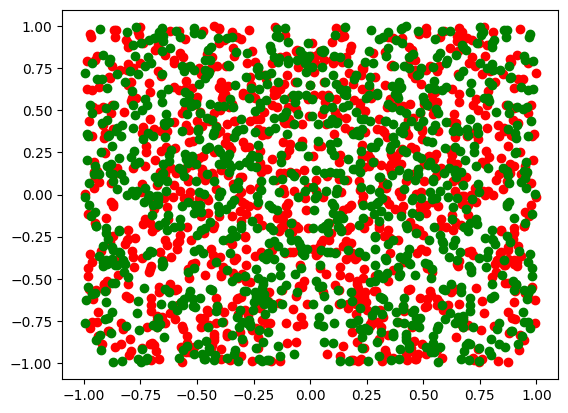

In [99]:
plt.scatter(x_input[:,0],x_input[:,1],c='red')
plt.scatter(y_output[:,0],y_output[:,1],c='green')

In [100]:
w1,b1,w2,b2 = initialise(2,10,2)

epochs = 100
for i in range(epochs):
    cost = 0
    for j in range(len(x_input)-1):
        input1 = x_input[j,:].T.reshape(2,1)
        output1 = y_output[j,:].T.reshape(2,1)
        z1,a1,z2,a2 = forwardProp(input1,w1,b1,w2,b2)
        loss,db2,dw2,db1,dw1 = computeGradient(a2,output1,z2,a1,w2,z1,input1)
        cost += loss
        b2,w2,b1,w1 = gradientDescent(b2,db2,w2,dw2,b1,db1,w1,dw1,0.1)
        print(cost)
    
        

0.030226393187130524
0.6884591836514063
2.3905021812413993
3.8280640654288685
5.7705448634556955
5.910526835240951
6.083049404040735
7.332015403391642
8.211852246351677
8.280221782756907
9.0567978954551
9.71181977470792
11.08574010072081
11.254475457125457
11.634735895706221
12.506289936006972
14.029246071502811
16.063757070507894
16.80465434772597
16.913778968594535
16.931400309977118
17.34631990553658
18.011757536736162
18.392166755509063
19.152639952610343
20.375220138982574
21.70541879402692
21.79733949497994
22.678617832974012
22.72892111864826
23.3200199931686
24.311386435337376
25.281972195591408
25.577551594561815
25.844009816312614
25.910460725360547
26.62168673703869
26.947764911733078
27.66224576814687
29.202654174174313
30.00075629472803
30.926039517688963
31.360307692188027
31.79566666581422
32.07572202812607
33.33544295832768
34.28165862514627
35.76985424922197
35.92835731863418
37.75946084791802
39.13970199158806
39.43400841892569
40.98263506130028
41.028604502429374
42.

In [101]:
test_x = np.arange(0,1,.01)
test_y = test_x**2

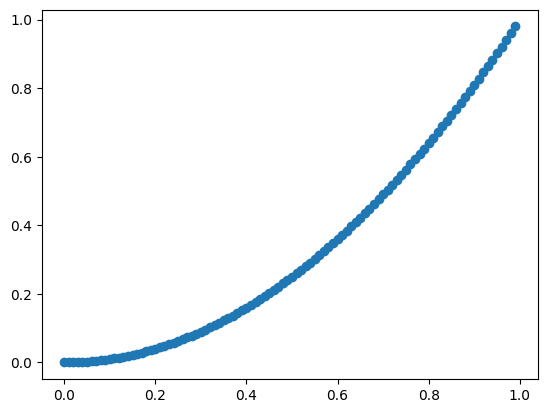

In [102]:
plt.scatter(test_x, test_y)
plt.show()

In [103]:
test = np.column_stack([test_x,test_y])
print(test[0:5,:])

[[0.     0.    ]
 [0.01   0.0001]
 [0.02   0.0004]
 [0.03   0.0009]
 [0.04   0.0016]]


In [104]:
n = test.shape[0]
output_x = []
output_y = []

for i in range(n):
    a0 = test[i,:].reshape(2,1)
    _,_,_,a2 = forwardProp(a0,w1,b1,w2,b2)
    output_x.append(a2[0,0])
    output_y.append(a2[1,0])
    
    

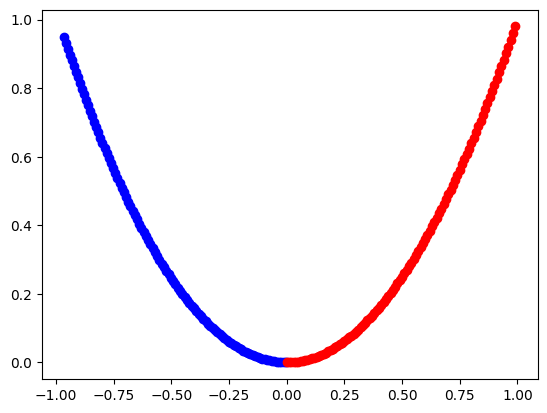

In [105]:
plt.scatter(output_x, output_y,c='blue')
plt.scatter(test[:,0],test[:,1],c='red')
plt.show()